<a href="https://colab.research.google.com/github/plthiyagu/Personnel/blob/master/Tesseract_Cheque_MICR_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!apt install tesseract-ocr
!apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libleptonica-dev
The following NEW packages will be installed:
  libleptonica-dev libtesseract-dev
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 2,755 kB of archives.
After this operation, 13.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libleptonica-dev amd6

In [3]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.5-py2.py3-none-any.whl size=13402 sha256=a6ce003f84a91d71fb7159d5645b0311e9f791eae838cf796f9a01123c8854bd
  Stored in directory: /root/.cache/pip/wheels/4c/57/f5/4e60154cc0cfb584373ec7922766e67d00f34879c21ed73f14
Successfully built pytesseract


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import pytesseract
from PIL import Image
import requests
from io import BytesIO
import cv2
import numpy as np

In [6]:
!ls -lart /usr/bin/tesseract

-rwxr-xr-x 1 root root 26712 Apr  7  2018 /usr/bin/tesseract


In [7]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

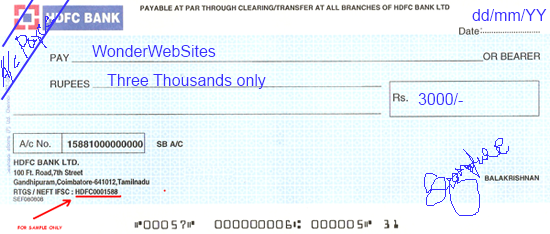

In [21]:
image= Image.open('/content/hdfc-bank-check1.jpg')
image

In [32]:
print(pytesseract.image_to_string(image, lang='eng'))

   
 

 

 

 

oc

Ore BANK LTD.
top ana Sec

 

 

‘series

sa ne 000s?" oo00000001

ora

pav__WonderWebSites

  

daimmvYY
Date:
On BEARER
rupees _ Three Thousands only 2p}
Rs. 3000/-

 



In [33]:
print(pytesseract.image_to_string(image, lang='eng'))

   
 

 

 

 

oc

Ore BANK LTD.
top ana Sec

 

 

‘series

sa ne 000s?" oo00000001

ora

pav__WonderWebSites

  

daimmvYY
Date:
On BEARER
rupees _ Three Thousands only 2p}
Rs. 3000/-

 



In [24]:
!wget https://raw.githubusercontent.com/BigPino67/Tesseract-MICR-OCR/master/Tessdata/mcr.traineddata

--2020-08-13 19:23:51--  https://raw.githubusercontent.com/BigPino67/Tesseract-MICR-OCR/master/Tessdata/mcr.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147363 (144K) [application/octet-stream]
Saving to: ‘mcr.traineddata’

mcr.traineddata     100%[===================>] 143.91K  --.-KB/s    in 0.04s   

2020-08-13 19:23:51 (3.39 MB/s) - ‘mcr.traineddata’ saved [147363/147363]



In [25]:
!cp mcr.traineddata /usr/share/tesseract-ocr/4.00/tessdata/

In [26]:
check_img= cv2.cvtColor(np.array(image),cv2.COLOR_RGB2BGR)
micr_img=check_img[625:717,0:1630]
check_img.shape

(234, 550, 3)

In [29]:
import google.colab.patches
google.colab.patches.cv2_imshow(micr_img)

error: ignored

In [34]:
print(pytesseract.image_to_string(image, lang='eng'))

   
 

 

 

 

oc

Ore BANK LTD.
top ana Sec

 

 

‘series

sa ne 000s?" oo00000001

ora

pav__WonderWebSites

  

daimmvYY
Date:
On BEARER
rupees _ Three Thousands only 2p}
Rs. 3000/-

 

